# Задача 4. Ансамбли

## Задача

- Найти данные размера хотя бы 10000, на которых можно решить задачу классификации или регрессии.
- Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- Самостоятельно реализуйте алгоритмы **Bagging** и **AdaBoost**, которые позволят обучить ансамбли каких-то простых моделей, например деревьев принятия решений.
- Обучите ансамбли для каких-то простых моделей, используя свои две реализации, а также реализации из **sklearn** (**Bagging**, **Random Forest**, **AdaBoost**, **Gradient Tree Boosting**, **Histogram-Based Gradient Boosting**).
- При обучении использовать **подбор гиперпараметров**, **кросс-валидацию**.
- Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества, построить матрицы ошибок.
- * (**+2 балла**) Также добавить в сравнение модели из библиотек **XGBoost**, **LightGBM** и **CatBoost**.
- * (**+3 балла**) Для подбора гиперпараметров использовать фреймворк **Optuna**.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%precision %.4f

'%.4f'

## Датасет

В работе используется датасет [Gas Turbine CO and NOx Emission Data Set](https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set).

Набор данных содержит 36733 экземпляра 11 измерений датчиков, агрегированных в течение одного часа (посредством среднего или суммы) от газовой турбины, расположенной в северо-западном регионе Турции, с целью изучения выбросов дымовых газов, а именно CO и NOx (NO + NO2). Данные поступают с электростанции для прогнозирования почасовой чистой выработки энергии. Данные содержат параметры газовой турбины (такие как температура на входе в турбину и давление нагнетания компрессора) в дополнение к переменным окружающей среды. Данные отсортированы в хронологическом порядке. Набор данных можно хорошо использовать для прогнозирования выхода энергии турбины (TEY) с использованием переменных окружающей среды в качестве признаков.

Нецелевые аттрибуты:
- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C
- Ambient pressure (AP) mbar
- Ambient humidity (AH) (%)
- Air filter difference pressure (AFDP) mbar
- Gas turbine exhaust pressure (GTEP) mbar
- Turbine inlet temperature (TIT) C
- Turbine after temperature (TAT) C
- Compressor discharge pressure (CDP) mbar
- Carbon monoxide (CO) mg/m3
- Nitrogen oxides (NOx) mg/m3

Целевой аттрибут:
- Turbine energy yield (TEY) MWH


In [3]:
gt_2011 = pd.read_csv('../../data/Gas_Turbine_CO_and_NOx_Emission/gt_2011.csv')
gt_2012 = pd.read_csv('../../data/Gas_Turbine_CO_and_NOx_Emission/gt_2012.csv')
gt_2013 = pd.read_csv('../../data/Gas_Turbine_CO_and_NOx_Emission/gt_2013.csv')
gt_2014 = pd.read_csv('../../data/Gas_Turbine_CO_and_NOx_Emission/gt_2014.csv')
gt_2015 = pd.read_csv('../../data/Gas_Turbine_CO_and_NOx_Emission/gt_2015.csv')

train_df = pd.concat([gt_2011, gt_2012, gt_2013])

test_df = pd.concat([gt_2014, gt_2015])

df = pd.concat([train_df, test_df])

df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [4]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

В данных нет пропущенных значений.

## Разведочный анализ (EDA)

### Распределение данных

Рассмотрим распределения всех аттрибутов.

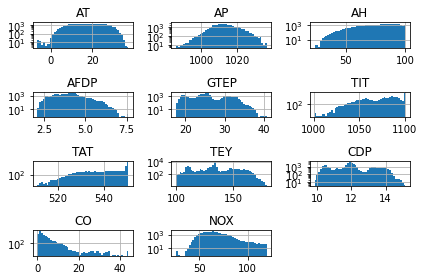

In [6]:
df.hist(bins=50, log=True)
plt.tight_layout()

Можно заметить достаточно большой разброс в значениях большинства аттрибутов.
Значения выглядят плавными.

### Корреляция аттрибутов

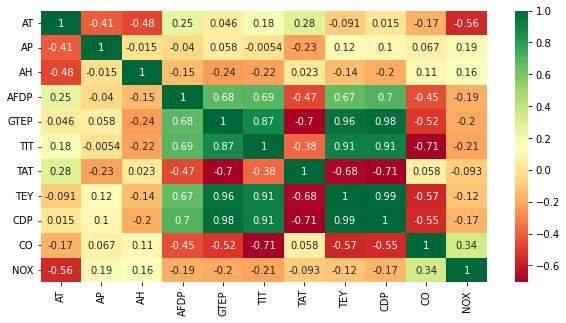

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Как можно заметить, в данных есть много линейных зависимостей.

Искомый параметр TEY - выработка энергии турбиной линейно зависим от CDP - давления нагнетания компрессора, GTEP - давления выхлопа, TIT - температуры на входе в турбину.

Для того что бы не потерять некоторые возможные интересные зависимости было решено не избавляться от данных линейно-зависимых параметров, однако если бы стояла задача об ускорении работы данных вычислений - это можно было бы сделать.

## Собственная реализация Bagging/AdaBoost

In [8]:
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.utils.validation import check_scalar, check_random_state, check_X_y, check_is_fitted, check_array
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.estimator_checks import check_estimator
import numpy as np

#from sklearn.utils.validation import check_X_y, , check_random_state, check_is_fitted, check_array


### Bagging

In [9]:
def _set_random_states(estimator, random_state=None):
    to_set = {}
    for key in sorted(estimator.get_params(deep=True)):
        if key == "random_state" or key.endswith("__random_state"):
            to_set[key] = random_state.randint(np.iinfo(np.int32).max)

    if to_set:
        estimator.set_params(**to_set)

In [10]:
class MyBaggingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, estimator=None, n_estimators=10, random_state=None):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state

    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.n_features_in_ = X.shape[1]

        self.n_estimators = check_scalar(self.n_estimators, "n_estimators", int, min_val=1)
        self.random_state_ = check_random_state(self.random_state)

        self.estimator_ = self.estimator if self.estimator else DecisionTreeRegressor()
        self.estimators_ = []

        for _ in range(self.n_estimators):
            est = clone(self.estimator_)
            _set_random_states(est, self.random_state_)
            ind = self.random_state_.choice(len(y), size=len(y))
            X_sample, y_sample = X[ind], y[ind]
            est.fit(X_sample, y_sample)
            self.estimators_.append(est)
        
        return self
        

    def predict(self, X):
        check_is_fitted(self)
        predictions = [estimator.predict(X) for estimator in self.estimators_]
        return np.mean(predictions, axis=0)

check_estimator(MyBaggingRegressor())

### AdaBoost

In [11]:
class MyAdaBoostRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, estimator=None, n_estimators=50, random_state=None):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.random_state = random_state

    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.n_features_in_ = X.shape[1]

        self.n_estimators = check_scalar(self.n_estimators, "n_estimators", int, min_val=1)
        self.random_state_ = check_random_state(self.random_state)

        self.estimator_ = self.estimator if self.estimator else DecisionTreeRegressor(max_depth=3)
        self.estimators_ = []
        self.weights_ = []
        weight = [1 / len(y)] * len(y)

        for _ in range(self.n_estimators):
            est = clone(self.estimator_)
            _set_random_states(est, self.random_state_)
            est.fit(X, y, sample_weight=weight)

            predict = est.predict(X)
            errors = np.abs(predict - y)

            max_error = np.max(errors)
            if max_error > 0:
                errors /= max_error

            error = np.sum(errors * weight)

            if not error:
                self.estimators_.append(est)
                self.weights_.append(1.0)
                break
                
            b = error / (1 - error)

            weight *= np.power(b, 1 - errors)
            weight /= np.sum(weight)

            self.weights_.append(np.log(1 / b))
            self.estimators_.append(est)
        self.weights_ = np.array(self.weights_)

        return self

    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)

        predict = np.array([est.predict(X) for est in self.estimators_]).T
        sorted_predict = np.argsort(predict, axis=1)

        sorted_weights_cumsum = np.cumsum(self.weights_[sorted_predict], axis=1)
        
        is_median_or_above = sorted_weights_cumsum >= (0.5 * sorted_weights_cumsum[0][-1])
        
        median_ids = np.argmax(is_median_or_above, axis=1)
        median_ids = sorted_predict[np.arange(len(X)), median_ids]

        return predict[np.arange(len(X)), median_ids]

check_estimator(MyAdaBoostRegressor())

### Обучение

In [12]:
import optuna
import pathlib
from sklearn.model_selection import KFold, cross_validate

In [13]:
def train_and_store(data, target, estimator, params, results_path = pathlib.Path("cv_results.csv")):
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
    optuna.logging.set_verbosity(optuna.logging.INFO)

    search_model = optuna.integration.OptunaSearchCV(
        estimator,
        params,
        scoring="r2",
        n_jobs=3,
        n_trials=None,
        random_state=42,
        study=study,
    )

    print("Start w search")
    results = cross_validate(
        search_model,
        data,
        target,
        cv=KFold(shuffle=True, random_state=42),
        scoring=["r2", "neg_mean_absolute_error"],
        n_jobs=4,
        return_estimator=True,
    )
    print("End w search")

    for fold_i, estimator_in_fold in enumerate(results["estimator"], start=1):
        print(f"Best params #{fold_i}:", estimator_in_fold.best_params_)

    results = pd.DataFrame(results).rename(
        columns={"estimator": "Regressor", "fit_time": "Fit time, s", "score_time": "Score time, s", "test_r2": "R2 on test"}
    )
    results["Regressor"] = estimator.__class__.__name__
    results["MAE on test"] = -results["test_neg_mean_absolute_error"]
    results = results.drop(columns=["test_neg_mean_absolute_error"])
    results.to_csv(results_path, mode="a", header=not results_path.exists())

In [14]:
df_data = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
df_target = df[['TEY']]

### Bagging

#### MyBaggingRegressor

In [15]:
%%time

train_and_store(
    df_data,
    df_target,
    MyBaggingRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
    },
    results_path=pathlib.Path("cv_bagging_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'n_estimators': 10}
Best params #2: {'n_estimators': 10}
Best params #3: {'n_estimators': 10}
Best params #4: {'n_estimators': 10}
Best params #5: {'n_estimators': 10}
CPU times: user 1.7 s, sys: 464 ms, total: 2.16 s
Wall time: 4min 35s


#### BaggingRegressor

In [16]:
%%time

from sklearn.ensemble import BaggingRegressor

train_and_store(
    df_data,
    df_target,
    BaggingRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
    },
    results_path=pathlib.Path("cv_bagging_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'n_estimators': 10}
Best params #2: {'n_estimators': 10}
Best params #3: {'n_estimators': 10}
Best params #4: {'n_estimators': 10}
Best params #5: {'n_estimators': 10}
CPU times: user 1.28 s, sys: 286 ms, total: 1.56 s
Wall time: 3min 2s


#### RandomForestRegressor

In [17]:
%%time
from sklearn.ensemble import RandomForestRegressor

train_and_store(
    df_data,
    df_target,
    RandomForestRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
    },
    results_path=pathlib.Path("cv_bagging_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'n_estimators': 10}
Best params #2: {'n_estimators': 10}
Best params #3: {'n_estimators': 10}
Best params #4: {'n_estimators': 10}
Best params #5: {'n_estimators': 10}
CPU times: user 1.18 s, sys: 151 ms, total: 1.33 s
Wall time: 2min 35s


#### Результаты

In [5]:
cv_results = pd.read_csv("cv_bagging_results.csv")
cv_results["Regressor"].apply(lambda x: x.removesuffix("Regressor"))

img, axs = plt.subplots(ncols=4, figsize=(15, 4))

for y, ax in zip(["Fit time, s", "Score time, s", "R2 on test", "MAE on test"], axs.flatten()):
    sns.barplot(cv_results[["Regressor", y]], x="Regressor", y=y, errwidth=1, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlabel(None)

img.tight_layout()

plt.show()

SyntaxError: invalid syntax (2552034760.py, line 2)

### Boosting

#### MyAdaBoostRegressor

In [19]:
%%time

train_and_store(
    df_data,
    df_target,
    MyAdaBoostRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Start w search
End w search
Best params #1: {'n_estimators': 10}
Best params #2: {'n_estimators': 10}
Best params #3: {'n_estimators': 10}
Best params #4: {'n_estimators': 10}
Best params #5: {'n_estimators': 10}
CPU times: user 337 ms, sys: 40.8 ms, total: 378 ms
Wall time: 47.3 s


#### AdaBoostRegressor

In [20]:
%%time
from sklearn.ensemble import AdaBoostRegressor

train_and_store(
    df_data,
    df_target,
    AdaBoostRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
        "learning_rate": optuna.distributions.CategoricalDistribution([0.5, 1, 2]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'n_estimators': 10, 'learning_rate': 2}
Best params #2: {'n_estimators': 10, 'learning_rate': 2}
Best params #3: {'n_estimators': 10, 'learning_rate': 1}
Best params #4: {'n_estimators': 10, 'learning_rate': 2}
Best params #5: {'n_estimators': 10, 'learning_rate': 2}
CPU times: user 680 ms, sys: 82.6 ms, total: 763 ms
Wall time: 1min 57s


#### GradientBoostingRegressor

In [21]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

train_and_store(
    df_data,
    df_target,
    GradientBoostingRegressor(random_state=42),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
        "learning_rate": optuna.distributions.CategoricalDistribution([0.05, 0.1, 0.2]),
        "max_leaf_nodes": optuna.distributions.CategoricalDistribution([10, 1000, None]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'n_estimators': 10, 'learning_rate': 0.2, 'max_leaf_nodes': 1000}
Best params #2: {'n_estimators': 10, 'learning_rate': 0.2, 'max_leaf_nodes': 1000}
Best params #3: {'n_estimators': 10, 'learning_rate': 0.2, 'max_leaf_nodes': 1000}
Best params #4: {'n_estimators': 10, 'learning_rate': 0.2, 'max_leaf_nodes': 1000}
Best params #5: {'n_estimators': 10, 'learning_rate': 0.2, 'max_leaf_nodes': 1000}
CPU times: user 1.78 s, sys: 232 ms, total: 2.01 s
Wall time: 5min 34s


#### HistGradientBoostingRegressor

In [22]:
%%time

from sklearn.ensemble import HistGradientBoostingRegressor

train_and_store(
    df_data,
    df_target,
    HistGradientBoostingRegressor(random_state=42, early_stopping=True),
    params={
        "learning_rate": optuna.distributions.CategoricalDistribution([0.5, 0.1, 0.2]),
        "max_leaf_nodes": optuna.distributions.CategoricalDistribution([15, 31, 62, None]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

Start w search


<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


End w search
Best params #1: {'learning_rate': 0.1, 'max_leaf_nodes': None}
Best params #2: {'learning_rate': 0.1, 'max_leaf_nodes': None}
Best params #3: {'learning_rate': 0.1, 'max_leaf_nodes': None}
Best params #4: {'learning_rate': 0.1, 'max_leaf_nodes': None}
Best params #5: {'learning_rate': 0.1, 'max_leaf_nodes': None}
CPU times: user 4.65 s, sys: 560 ms, total: 5.21 s
Wall time: 15min 6s


#### XGBoost

In [23]:
%%time

from xgboost import XGBRegressor

train_and_store(
    df_data,
    df_target,
    XGBRegressor(random_state=42, n_jobs=2),
    params={
        "tree_method": optuna.distributions.CategoricalDistribution(["exact", "approx", "hist"]),
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
        "learning_rate": optuna.distributions.CategoricalDistribution([0.1, 0.3, 0.5]),
        "max_leaves": optuna.distributions.CategoricalDistribution([0, 15, 31]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Start w search
End w search
Best params #1: {'tree_method': 'exact', 'n_estimators': 10, 'learning_rate': 0.5, 'max_leaves': 0}
Best params #2: {'tree_method': 'exact', 'n_estimators': 10, 'learning_rate': 0.5, 'max_leaves': 0}
Best params #3: {'tree_method': 'exact', 'n_estimators': 10, 'learning_rate': 0.5, 'max_leaves': 0}
Best params #4: {'tree_method': 'exact', 'n_estimators': 10, 'learning_rate': 0.5, 'max_leaves': 0}
Best params #5: {'tree_method': 'exact', 'n_estimators': 10, 'learning_rate': 0.5, 'max_leaves': 0}
CPU times: user 1.63 s, sys: 195 ms, total: 1.83 s
Wall time: 4min 51s


#### LightGBM

In [24]:
%%time

from lightgbm import LGBMRegressor

train_and_store(
    df_data,
    df_target,
    LGBMRegressor(random_state=42, n_jobs=2),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
        "learning_rate": optuna.distributions.CategoricalDistribution([0.03, 0.1, 0.3]),
        "num_leaves": optuna.distributions.CategoricalDistribution([15, 31, 62]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Start w search
End w search
Best params #1: {'n_estimators': 10, 'learning_rate': 0.3, 'num_leaves': 62}
Best params #2: {'n_estimators': 10, 'learning_rate': 0.3, 'num_leaves': 62}
Best params #3: {'n_estimators': 10, 'learning_rate': 0.3, 'num_leaves': 62}
Best params #4: {'n_estimators': 10, 'learning_rate': 0.3, 'num_leaves': 62}
Best params #5: {'n_estimators': 10, 'learning_rate': 0.3, 'num_leaves': 62}
CPU times: user 1.39 s, sys: 121 ms, total: 1.51 s
Wall time: 1min 2s


#### CatBoost

In [28]:
%%time

from catboost import CatBoostRegressor

train_and_store(
    df_data,
    df_target,
    CatBoostRegressor(random_state=42, thread_count=2),
    params={
        "n_estimators": optuna.distributions.CategoricalDistribution([3, 5, 10]),
    },
    results_path=pathlib.Path("cv_boosting_results.csv"),
)

<ipython-input-13-cf42d628b72c>:3: ExperimentalWarning: BruteForceSampler is experimental (supported from v3.1.0). The interface can change in the future.
  study = optuna.create_study(sampler=optuna.samplers.BruteForceSampler(999), direction="maximize")
<ipython-input-13-cf42d628b72c>:6: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  search_model = optuna.integration.OptunaSearchCV(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:90: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  new_object = klass(**new_object_params)


Start w search
End w search
Best params #1: {'n_estimators': 10}
Best params #2: {'n_estimators': 10}
Best params #3: {'n_estimators': 10}
Best params #4: {'n_estimators': 10}
Best params #5: {'n_estimators': 10}
CPU times: user 155 ms, sys: 14.1 ms, total: 169 ms
Wall time: 14 s


#### Результаты

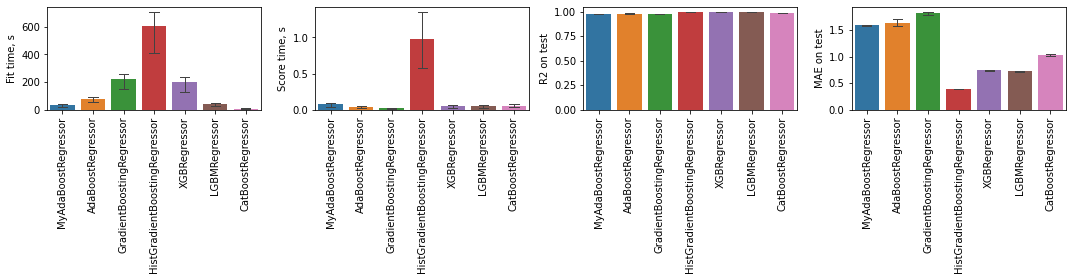

In [29]:
cv_results = pd.read_csv("cv_boosting_results.csv")
cv_results["Regressor"].apply(lambda x: x.removesuffix("Regressor"))

img, axs = plt.subplots(ncols=4, figsize=(15, 4))

for y, ax in zip(["Fit time, s", "Score time, s", "R2 on test", "MAE on test"], axs.flatten()):
    sns.barplot(cv_results[["Regressor", y]], x="Regressor", y=y, errwidth=1, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlabel(None)

img.tight_layout()

plt.show()

### Общие результаты

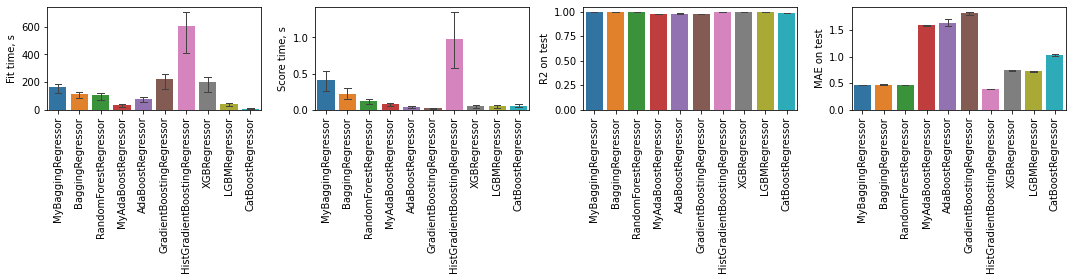

In [31]:
cv_results = pd.concat([pd.read_csv("cv_bagging_results.csv"), pd.read_csv("cv_boosting_results.csv")])
cv_results["Regressor"].apply(lambda x: x.removesuffix("Regressor"))

img, axs = plt.subplots(ncols=4, figsize=(15, 4))

for y, ax in zip(["Fit time, s", "Score time, s", "R2 on test", "MAE on test"], axs.flatten()):
    sns.barplot(cv_results[["Regressor", y]], x="Regressor", y=y, errwidth=1, capsize=0.3, ax=ax)
    ax.tick_params(axis="x", rotation=90)
    ax.set_xlabel(None)

img.tight_layout()

plt.show()